This notebook created to calculate H2 molecule using Hartree-Fock method in STO-3G basis set.

https://github.com/Sheffield-Theoretical-Chemistry/hf-notebook/blob/master/hf-heh.ipynb

In [ ]:
import math                     # library for math constants
import numpy as np              # library for arrays
import matplotlib.pyplot as plt # library for drawing plots

# Molecule definition
In this program, the two-atomic molecule is defined by the atom charges and distance:

In [ ]:
ZA = 2.0 # He
ZB = 1.0 # H
R = 1.4632

# STO-NG basis set review
Let's consider the minimal STO-NG basis set. The STO-NG is a Pople basis set, that fitts Slater type orbitals (**STO**) using several primitive Gaussian (**G**) functions.

---


The 1s Slater type orbital function looks like:
\begin{align}
\psi_{1s}^{STO}=(\frac{\zeta^{3}}{\pi})^{\frac{1}{2}} e^{-\zeta r}.
\end{align}\
Let's plot it below.


---


What happens if ZETA ($\zeta$) is increased from 1.0 to 1.5?

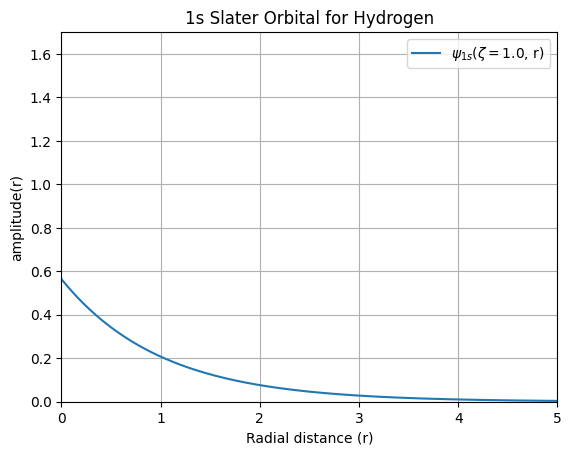

In [ ]:
# Parameters for hydrogen 1s orbital
ZETA = 1.0       # <-- try to change to 1.5 or 2.0

# Radial distance
r = np.linspace(0, 5, 500)

# 1s Slater orbital function
psi_1s = math.sqrt(ZETA**3/math.pi)*np.exp(-ZETA * r)

# Plot the function
plt.plot(r, psi_1s, label='$\psi_{1s}(\zeta=$'+str(ZETA)+', r)')
plt.title('1s Slater Orbital for Hydrogen')
plt.xlim(0, 5)
plt.ylim(0, 1.7)
plt.xlabel('Radial distance (r)')
plt.ylabel('amplitude(r)')
plt.legend()
plt.grid(True)
plt.show()

The Slater orbital resembles the known shape of the wavefunction for hydrogen atom and can correctly model the orbital overlap on the long distances.
However, the **Slater orbitals are computationally expensive to integrate**. **Gaussian functions (GF) are easier to integrate**, so we will use the combination of them to fit the Slater function.

---


The contracted Gaussian function (**CGF**), composed from the normalized primitive gaussian functions, is:
\begin{align}
\phi_{STO-NG}^{CGF}=\sum_{i=1}^{N} c_{i} \varphi_{i}^{GF}, \\
\varphi_{i}^{GF}=(\frac{2\alpha_{i}\zeta}{\pi})^{\frac{3}{4}}e^{-\alpha_{i} r^{2}}.
\end{align}


---


Let's define the exponents $\alpha_{i}$ and contraction coefficients $c_{i}$ for the minimal Pople STO-NG basis set (this data is optimized by least square fitting procedure):

In [ ]:
                #  1 (STO-1G), 2(STO-2G), or 3(STO-3G)
expon = np.array([[0.270950,   0.151623,     0.109818],  # alpha (zeta=1.0)
                  [0.0,        0.851819,     0.405771],
                  [0.0,        0.0,          2.22766]])
coeff = np.array([[1.0,        0.678914,     0.444635],  # c     (zeta=1.0)
                  [0.0,        0.430129,     0.535328],
                  [0.0,        0.0,          0.154329]])

Now, let's compare how well STO-1G, STO-2G, and STO-3G can approximate Slater function. Which **STO-NG** is better?

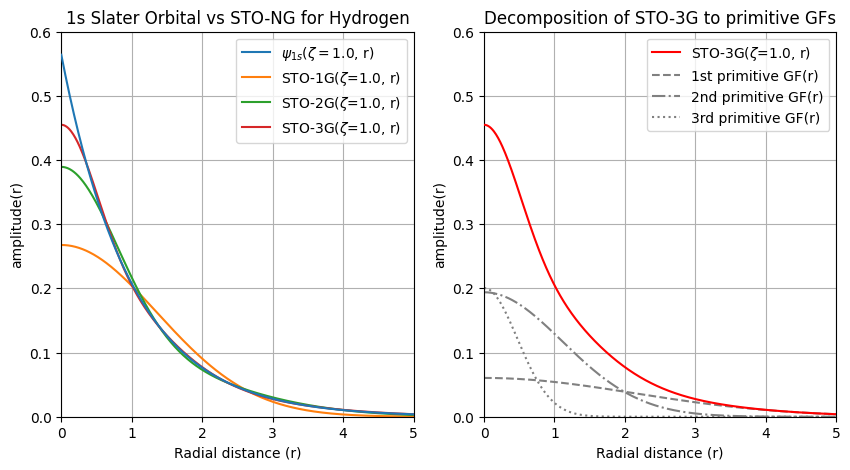

In [ ]:
sto_ng = np.zeros([3,len(r)])

for i in range(3):
    for j in range(3):
        sto_ng[i,:] = sto_ng[i,:] + coeff[j,i]*(2*expon[j,i]*ZETA/math.pi)**0.75*np.exp(-expon[j,i] * r**2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(r, psi_1s, label='$\psi_{1s}(\zeta=$'+str(ZETA)+', r)', zorder=4 )
ax1.plot(r, sto_ng[0,:], label='STO-1G($\zeta$='+str(ZETA)+', r)')
ax1.plot(r, sto_ng[1,:], label='STO-2G($\zeta$='+str(ZETA)+', r)')
ax1.plot(r, sto_ng[2,:], label='STO-3G($\zeta$='+str(ZETA)+', r)')
ax1.set_title('1s Slater Orbital vs STO-NG for Hydrogen')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 0.6)
ax1.set_xlabel('Radial distance (r)')
ax1.set_ylabel('amplitude(r)')
ax1.legend()
ax1.grid(True)

ax2.plot(r, sto_ng[2,:], label='STO-3G($\zeta$='+str(ZETA)+', r)', color='red', zorder=4)
ax2.plot(r, coeff[0,2]*(2*expon[0,2]*ZETA/math.pi)**0.75 * np.exp(-expon[0,2] * r**2), label='1st primitive GF(r)', color='gray', ls='--')
ax2.plot(r, coeff[1,2]*(2*expon[1,2]*ZETA/math.pi)**0.75 * np.exp(-expon[1,2] * r**2), label='2nd primitive GF(r)', color='gray', ls='-.')
ax2.plot(r, coeff[2,2]*(2*expon[2,2]*ZETA/math.pi)**0.75 * np.exp(-expon[2,2] * r**2), label='3rd primitive GF(r)', color='gray', ls=':')
ax2.set_title('Decomposition of STO-3G to primitive GFs')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 0.6)
ax2.set_xlabel('Radial distance (r)')
ax2.set_ylabel('amplitude(r)')
ax2.legend()
ax2.grid(True)

plt.show()

Now, let's choose which STO-NG basis (1G, 2G, or 3G) we want to use. Also, we should **scale the basis exponents and contraction coefficient** for each atom according the $\zeta$ parameter, such as $\alpha'=\alpha(\zeta=1.0)*\zeta^{2}$. Note that in molecule system $\zeta$ will be greater than 1.0 because electron density adjusts to the presence of other electrons and nuclei.

In [ ]:
N = 3          # 1, 2, or 3 gaussians are used to fit one Slater orbital
ZETA1 = 2.0925 # He
ZETA2 = 1.2400 # H
A1 = np.empty(3) # place to hold scaled exponents
A2 = np.empty(3)
D1 = np.empty(3) # place to hold scaled coefficients
D2 = np.empty(3)

for i in range(N):
    A1[i] = expon[i,N-1]*(ZETA1**2)
    A2[i] = expon[i,N-1]*(ZETA2**2)
    D1[i] = coeff[i,N-1]*((2*A1[i]/math.pi)**0.75)
    D2[i] = coeff[i,N-1]*((2*A2[i]/math.pi)**0.75)

# Constracting Hartree-Fock-Roothaan equation

The *restricted* (i.e., spin functions for $\alpha$ and $\beta$ spins are same) *closed-shell* (i.e., molecule has even number of electrons, all paired) Hartree-Fock (HF) equation is:

\begin{aligned}
f(\mathbf{r_{1}})\psi_{i}(\mathbf{r_{1}}) = \varepsilon_{i}\psi_{i}(\mathbf{r_{1}}),
\end{aligned}

where $r_{1}$ is one electron position, $f$ is a Fock operator, $\psi_{i}$ are the spatial molecular orbitals, and $\varepsilon_{i}$ are their energies.\
The contribution of Roothaan was to show how to solve the HF equation in a standard matrix technique by introdusing the set of known basis functions. We will expand the unknown molecular orbitals $\psi_{i}$ as linear combination of N basis orbitals $\phi_{\mu}$ as:

\begin{align}
\psi_{i}=\sum_{\mu=1}^{N}{C_{\mu i}\phi_{\mu}} \quad i=1,2,...,N
\end{align}

thus, the problem of calculating the HF molecular orbitals reduces to the finding the set of expansion coefficients $C_{\mu i}$:

\begin{align}
f(\mathbf{r_{1}})\sum_{\nu}{C_{\nu i}\phi_{\nu}}=\varepsilon_{i}\sum_{\nu}{C_{\nu i}\phi_{\nu}}
\end{align}

By multiplying by $\phi^{*}_{\mu}(1)$ on the left and integrating, the differential equation turns into a matrix equation:

\begin{align}
\sum_{\nu}{C_{\nu i} \int d\mathbf{r_{1}} \phi^{*}_{\mu} f(\mathbf{r_{1}}) \phi_{\nu}}=\varepsilon_{i}\sum_{\nu}{C_{\nu i}\int d\mathbf{r_{1}} \phi^{*}_{\mu}\phi_{\nu}}
\end{align}

Two matrices are defined from the above equation:\
1) The *overlap matrix* **S** with elements

\begin{align}
S_{\mu \nu}=\int d\mathbf{r_{1}} \phi^{*}_{\mu}\phi_{\nu}
\end{align}

which characterize the overlap between basis functions.\
2) The *Fock matrix* **F** with elements

\begin{align}
F_{\mu \nu}=\int d\mathbf{r_{1}} \phi^{*}_{\mu} f(\mathbf{r_{1}}) \phi_{\nu}
\end{align}

which is the matrix representation of Fock operator.\
The Hartree-Fock-Roothaan equation in a short form is:

\begin{align}
\mathbf{FC}=\mathbf{SC\varepsilon}
\end{align}

or
$$
\begin{pmatrix}
F_{11} & F_{12} & \cdots & F_{1N}\\
F_{21} & F_{22} & \cdots & F_{2N}\\
\vdots & \vdots &        & \vdots\\
F_{N1} & F_{N2} & \cdots & F_{NN}\\
\end{pmatrix}
\times
\begin{pmatrix}
C_{11} & C_{12} & \cdots & C_{1N}\\
C_{21} & C_{22} & \cdots & C_{2N}\\
\vdots & \vdots &        & \vdots\\
C_{N1} & C_{N2} & \cdots & C_{NN}\\
\end{pmatrix}
=
\begin{pmatrix}
S_{11} & S_{12} & \cdots & S_{1N}\\
S_{21} & S_{22} & \cdots & S_{2N}\\
\vdots & \vdots &        & \vdots\\
S_{N1} & S_{N2} & \cdots & S_{NN}\\
\end{pmatrix}
\begin{pmatrix}
C_{11} & C_{12} & \cdots & C_{1N}\\
C_{21} & C_{22} & \cdots & C_{2N}\\
\vdots & \vdots &        & \vdots\\
C_{N1} & C_{N2} & \cdots & C_{NN}\\
\end{pmatrix}
\begin{pmatrix}
\varepsilon_{1} & 0 & 0  & 0 \\
 0 & \varepsilon_{2} & 0 & 0 \\
 0 &   0    & \ddots     & 0 \\
 0 & 0 & 0 & \varepsilon_{K} \\
\end{pmatrix}
$$


## Calculating electron integrals

Center A is first atom, center B is second atom

In [ ]:
def f0(arg):
  # calculate the f0 function for s-type orbitals
    if arg < 10**(-6):
        fzero = 1.0 - arg/3.0
    else:
        fzero = (math.pi/arg)**0.5 * math.erf(arg**0.5)/2.0
    return fzero

### Overlap integrals

In [ ]:
def overlap(A, B, RAB2):
  # calculate overlap for un-normalized primitives
    s = (math.pi/(A+B))**1.5*math.exp(-A*B*RAB2/(A+B))
    return s

### Kinetic energy integrals

In [ ]:
def kinetic(A, B, RAB2):
  # calculate kinetic energy integrals for un-normalized primitives
    t = A*B/(A+B) * (3.0-2*A*B*RAB2/(A+B)) * (math.pi/(A+B))**1.5 * math.exp(-A*B*RAB2/(A+B))
    return t

### Potential energy integrals

In [ ]:
def potential(A, B, RAB2, RCP2, ZC):
  # calculate kinetic energy for un-normalized primitives
    v = 2.0*math.pi/(A+B) * f0((A+B)*RCP2) * math.exp(-A*B*RAB2/(A+B))
    return -v*ZC

In [ ]:
def matout(matrix, m, n, label):
  # print matrices of size m by n
    print("\nThe %s matrix" % (label))
    for i in range(n):
        print("\t %i \t" % (i+1), end='') # matrix column indices
    print() # newline
    for i in range(m):
        print(i+1, end='') # matrix row index
        for j in range(n):
            print("\t %.7f" % (matrix[i][j]), end='')
        print() #newline

### Hamiltonian

In [ ]:
S11, S12, S22 = 1.0, 0.0, 1.0
T11, T12, T22 = 0.0, 0.0, 0.0
V11A, V12A, V22A = 0.0, 0.0, 0.0
V11B, V12B, V22B = 0.0, 0.0, 0.0

for i in range(N):
    for j in range(N):
        RAP = A2[j]*R/(A1[i]+A2[j])
        RAP2 = RAP**2
        RBP2 = (R-RAP)**2
        S12 = S12 + overlap(A1[i], A2[j], R**2) *D1[i]*D2[j]
        T11 = T11 + kinetic(A1[i], A1[j], 0.0) *D1[i]*D1[j]
        T12 = T12 + kinetic(A1[i], A2[j], R**2) *D1[i]*D2[j]
        T22 = T22 + kinetic(A2[i], A2[j], 0.0) *D2[i]*D2[j]
        V11A = V11A + potential(A1[i], A1[j], 0.0, 0.0, ZA) *D1[i]*D1[j]
        V12A = V12A + potential(A1[i], A2[j], R**2, RAP2, ZA) *D1[i]*D2[j]
        V22A = V22A + potential(A2[i], A2[j], 0.0, R**2, ZA) *D2[i]*D2[j]
        V11B = V11B + potential(A1[i], A1[j], 0.0, R**2, ZB) *D1[i]*D1[j]
        V12B = V12B + potential(A1[i], A2[j], R**2, RBP2, ZB) *D1[i]*D2[j]
        V22B = V22B + potential(A2[i], A2[j], 0.0, 0.0, ZB) *D2[i]*D2[j]


In [ ]:
S21 = S12
smatrix = np.array([[S11,S12],[S21,S22]])
matout(smatrix, 2, 2, "S")


The S matrix
	 1 		 2 	
1	 1.0000000	 0.4507704
2	 0.4507704	 1.0000000


In [ ]:
xmatrix = np.zeros([2,2])

xmatrix[0,0] = 1.0 / (2.0*(1.0+S12))**0.5
xmatrix[1,0] = xmatrix[0,0]
xmatrix[0,1] = 1.0 / (2.0*(1.0-S12))**0.5
xmatrix[1,1] = -xmatrix[0,1]

matout(xmatrix, 2, 2, "X")

xtmatrix = np.zeros([2,2])

xtmatrix[0,0] = xmatrix[0,0]
xtmatrix[1,0] = xmatrix[0,1]
xtmatrix[0,1] = xmatrix[1,0]
xtmatrix[1,1] = xmatrix[1,1]

matout(xtmatrix, 2, 2, "X transposed")


The X matrix
	 1 		 2 	
1	 0.5870643	 0.9541311
2	 0.5870643	 -0.9541311

The X transposed matrix
	 1 		 2 	
1	 0.5870643	 0.5870643
2	 0.9541311	 -0.9541311


In [ ]:
T21 = T12
tmatrix = np.array([[T11,T12],[T21,T22]])
matout(tmatrix, 2, 2, "T")


The T matrix
	 1 		 2 	
1	 2.1643126	 0.1670129
2	 0.1670129	 0.7600329


In [ ]:
V11 = V11A + V11B
V12 = V12A + V12B
V21 = V12
V22 = V22A + V22B
vmatrix = np.array([[V11,V12],[V21,V22]])
matout(vmatrix, 2, 2, "V")


The V matrix
	 1 		 2 	
1	 -4.8170573	 -1.5142180
2	 -1.5142180	 -2.4918613


### Hamiltonian: kinetic energy and nuclear attraction itegrals

In [ ]:
hmatrix = tmatrix + vmatrix
matout(hmatrix, 2, 2, "H")


The H matrix
	 1 		 2 	
1	 -2.6527447	 -1.3472052
2	 -1.3472052	 -1.7318284


### Two-electron integrals

In [ ]:
# There are 6 two-electron integrals with unique values:
V1111, V2111, V2121, V2211, V2221, V2222 = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

def two_electron(A, B, C, D, RAB2, RCD2, RPQ2):
  # calcualte two-electron integrals for un-normalized primitives with four centers involved (A, B, C, D) and combined A-B/C-D centers P and Q, respectively
    twoe = 2.0*(math.pi**2.5) / ((A+B)*(C+D)* ((A+B+C+D)**0.5)) * f0((A+B)*(C+D)*RPQ2/(A+B+C+D)) * math.exp(-A*B*RAB2/(A+B) - C*D*RCD2/(C+D))
    return twoe

for i in range(N):
        for j in range (N):
            for k in range(N):
                for l in range(N):
                    RAP = A2[i]*R/(A2[i]+A1[j])
                    RBP = R - RAP
                    RAQ = A2[k]*R/(A2[k]+A1[l])
                    RBQ = R - RAQ
                    RPQ = RAP - RAQ
                    V1111 = V1111 + two_electron(A1[i], A1[j], A1[k], A1[l], 0.0, 0.0, 0.0)*D1[i]*D1[j]*D1[k]*D1[l]
                    V2111 = V2111 + two_electron(A2[i], A1[j], A1[k], A1[l], R**2, 0.0, RAP**2)*D2[i]*D1[j]*D1[k]*D1[l]
                    V2121 = V2121 + two_electron(A2[i], A1[j], A2[k], A1[l], R**2, R**2, RPQ**2)*D2[i]*D1[j]*D2[k]*D1[l]
                    V2211 = V2211 + two_electron(A2[i], A2[j], A1[k], A1[l], 0.0, 0.0, R**2)*D2[i]*D2[j]*D1[k]*D1[l]
                    V2221 = V2221 + two_electron(A2[i], A2[j], A2[k], A1[l], 0.0, R**2, RBQ**2)*D2[i]*D2[j]*D2[k]*D1[l]
                    V2222 = V2222 + two_electron(A2[i], A2[j], A2[k], A2[l], 0.0, 0.0, 0.0)*D2[i]*D2[j]*D2[k]*D2[l]

In [ ]:
twoematrix = np.empty([2,2,2,2])

# 1) remember that array indexing starts with 0, so [0] = first index, [1] = second index
# 2) the integrals have permutation symmetry such as <11|12> = <11|21> = <12|11> = <21|11>, etc.

twoematrix[0,0,0,0] = V1111
twoematrix[0,0,0,1] = V2111
twoematrix[0,0,1,0] = V2111
twoematrix[0,0,1,1] = V2211

twoematrix[0,1,0,0] = V2111
twoematrix[0,1,0,1] = V2121
twoematrix[0,1,1,0] = V2121
twoematrix[0,1,1,1] = V2221

twoematrix[1,0,0,0] = V2111
twoematrix[1,0,0,1] = V2121
twoematrix[1,0,1,0] = V2121
twoematrix[1,0,1,1] = V2221

twoematrix[1,1,0,0] = V2211
twoematrix[1,1,0,1] = V2221
twoematrix[1,1,1,0] = V2221
twoematrix[1,1,1,1] = V2222

for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                print("( %i %i %i %i ) \t %f" % (i+1, j+1, k+1, l+1, twoematrix[i][j][k][l]))


( 1 1 1 1 ) 	 1.307152
( 1 1 1 2 ) 	 0.437279
( 1 1 2 1 ) 	 0.437279
( 1 1 2 2 ) 	 0.605703
( 1 2 1 1 ) 	 0.437279
( 1 2 1 2 ) 	 0.177267
( 1 2 2 1 ) 	 0.177267
( 1 2 2 2 ) 	 0.311795
( 2 1 1 1 ) 	 0.437279
( 2 1 1 2 ) 	 0.177267
( 2 1 2 1 ) 	 0.177267
( 2 1 2 2 ) 	 0.311795
( 2 2 1 1 ) 	 0.605703
( 2 2 1 2 ) 	 0.311795
( 2 2 2 1 ) 	 0.311795
( 2 2 2 2 ) 	 0.774608


In [ ]:
def formg(pmatrix, twoematrix):
  # calculate G matrix as P*(J - K)
    gmatrix = np.zeros([2,2])
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    gmatrix[i][j] = gmatrix[i][j] + pmatrix[k][l]*(twoematrix[i][j][k][l] - 0.5*twoematrix[i][l][k][j])
    return gmatrix

### Linear Roothaan equation

\begin{align}
\mathbf{X^{\dagger}SX=1}
\end{align}

### Initialize matrices

In [ ]:
def diag(fmatrix):
  # diogonalizes Fock matrix to give eigenvectors and eigenvalues

  # 1) choose the angle theta that describes the symmetry determined solution
  #    if diogonal elements of Fock matrix are identical -> the molecule is homonuclear
    if math.fabs(fmatrix[0,0] - fmatrix[1,1]) < (1e-20):
        theta = math.pi/4
  #    diogonal elements of Fock matrix are different -> the molecule is heteronuclear
    else:
        theta = 0.5*math.atan(2*fmatrix[0,1]/(fmatrix[0,0] - fmatrix[1,1]))
  # 2) define the eigenvectors matrix and eigenvalues matrix
    cmatrix = np.empty([2,2])
    epsilonmatrix = np.empty([2,2])

  # 3) enumerate the cmatrix with theta values
    cmatrix[0,0] = math.cos(theta)
    cmatrix[0,1] = math.sin(theta)
    cmatrix[1,0] = math.sin(theta)
    cmatrix[1,1] = -math.cos(theta)

  # 4) calculte the eigenvalues
    epsilonmatrix[0,0] = fmatrix[0,0]*math.cos(theta)**2 + fmatrix[1,1]*math.sin(theta)**2 + fmatrix[0,1]*math.sin(2*theta)
    epsilonmatrix[1,1] = fmatrix[1,1]*math.cos(theta)**2 + fmatrix[0,0]*math.sin(theta)**2 - fmatrix[0,1]*math.sin(2*theta)
    epsilonmatrix[0,1] = 0.0
    epsilonmatrix[1,0] = 0.0

  # 5) order eigenvalues and eigenvectors from smallest orbital energy to largest
    if epsilonmatrix[0,0] > epsilonmatrix[1,1]:
        epsilonmatrix[0,0], epsilonmatrix[1,1] = epsilonmatrix[1,1], epsilonmatrix[0,0]
        cmatrix.T[[0, 1]] = cmatrix.T[[1, 0]]
    return cmatrix, epsilonmatrix

In [ ]:
crit = 1e-4 # density convergence criteria
maxit = 25  # maximum number of SCF iteration
IOP = 1     # level of print out on every SCF iteration: (1) print only energy and delta P; (2) 1 + MO coeffs & MO energies; (3) 2 + other intermediate matrices

In [ ]:
pmatrix = np.zeros([2,2])
oldpmatrix = np.zeros([2,2])

# use the core Hamiltonian matrix as inital density guess:
#pmatrix = hmatrix

gmatrix = np.empty([2,2])
fmatrix = np.empty([2,2])
cmatrix = np.empty([2,2])
epsilonmatrix = np.empty([2,2])

enlist = []
deltaplist = []

iter = 0    # current iteration

print("SCF started! \n")
while True:
    iter = iter + 1
    if (IOP > 2) : matout(pmatrix, 2, 2, "current P")
    print("\nSTART OF INTERATION NUMBER = %i" % (iter))
    gmatrix = formg(pmatrix, twoematrix)
    if (IOP > 2) : matout(gmatrix, 2, 2, "G")
    fmatrix = hmatrix + gmatrix
    en = 0.0
    for i in range(2):
        for j in range(2):
            en = en + 0.5*pmatrix[i,j]*(hmatrix[i,j]+fmatrix[i,j])
    if (IOP > 2) : matout(fmatrix, 2, 2, "current F")
    print("\nElectronic energy = %f a.u." % (en))
    enlist.append(en)
    # Transform Fock matrix to F' using G matrix as temporal storage
    gmatrix = np.matmul(fmatrix,xmatrix)
    fprimematrix = np.matmul(xtmatrix,gmatrix)
    # Diogonalize F' to get C' matrix and eigenvalues
    cprimematrix, epsilonmatrix = diag(fprimematrix)
    # Transform C' back to C
    cmatrix = np.matmul(xmatrix, cprimematrix)
    # Form new density matrix P, but first save the present P for comparison
    for i in range(2):
        for j in range(2):
            oldpmatrix[i,j] = pmatrix[i,j]
            pmatrix[i,j] = 2*cmatrix[i,0]*cmatrix[j,0]
    if (IOP > 2) : matout(fprimematrix, 2, 2, "F prime")
    if (IOP > 2) : matout(cprimematrix, 2, 2, "C prime")
    # Print new MO coefficients and density
    if (IOP > 2) : matout(pmatrix, 2, 2, "New density matrix P")
    if (IOP > 1) : print("\nNew MO energies \n \t %f \t %f" % (epsilonmatrix[0,0], epsilonmatrix[1,1]))
    if (IOP > 1) : matout(cmatrix, 2, 2, "new MO coefficients")

    # Calculate delta in density
    deltap = 0.0
    for i in range(2):
        for j in range(2):
            deltap = deltap + (pmatrix[i,j] - oldpmatrix[i,j])**2
    deltap = (deltap/4)**0.5
    deltaplist.append(deltap)
    print("\nConvergence of density matrix = %.12f" % (deltap))
    # Check if the convergence sattisfys the choosen criteria
    if deltap < crit:
        print("\nSCF converged after %i iteration" % (iter))
        break
    elif iter > maxit:
        print("\nMaximum number of iterations was reached! \n Density is not converged")
        break

SCF started! 


START OF INTERATION NUMBER = 1

Electronic energy = 0.000000 a.u.

Convergence of density matrix = 0.882866853014

START OF INTERATION NUMBER = 2

Electronic energy = -4.141863 a.u.

Convergence of density matrix = 0.279176304069

START OF INTERATION NUMBER = 3

Electronic energy = -4.226492 a.u.

Convergence of density matrix = 0.029661780077

START OF INTERATION NUMBER = 4

Electronic energy = -4.227523 a.u.

Convergence of density matrix = 0.002318284870

START OF INTERATION NUMBER = 5

Electronic energy = -4.227529 a.u.

Convergence of density matrix = 0.000174397697

START OF INTERATION NUMBER = 6

Electronic energy = -4.227529 a.u.

Convergence of density matrix = 0.000013079512

SCF converged after 6 iteration


Exersizes:

*   change intial guess
*   change molecule
*   change basis set
*.  change convergence criteria to more strict (1e-5, 1e-6, 1e-7)